In [127]:
#Importing basic libraries

import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

First I cleaned the given data set. I have filled the missing values in column 6 of the data set by the mean of values in column 6. I have also dropped duplicate rows which have same ID numbers

In [128]:
df = pd.read_csv("CANCER.csv", header = None)        #Reading cleaned dataset

In [129]:
df            #This is how our cleaned data set looks like. here last column (10th) is the Class

,0,1,2,3,4,5,6,7,8,9,10
0,61634,5,4,3,1,2,3.545,2,3,1,2
1,63375,9,1,2,6,4,10.000,7,7,2,4
2,76389,10,4,7,2,2,8.000,6,1,1,4
3,95719,6,10,10,10,8,10.000,7,10,7,4
4,128059,1,1,1,1,2,5.000,5,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
640,1369821,10,10,10,10,5,10.000,10,10,7,4
641,1371026,5,10,10,10,4,10.000,5,6,3,4
642,1371920,5,1,1,1,2,1.000,3,2,1,2
643,8233704,4,1,1,1,1,1.000,2,1,1,2


In [130]:
X = df.iloc[:,:10]      # X is the dataset excluding 10th column i.e class column

In [180]:
K=2        #  Number of clusters

In [181]:
# Here I have created a dictionary named centroids which has key as cluster number and value as a list of 9 features (1 to 9)
# Which represent centroid of that cluster
# value of every feature is between 1 to 10. Therefore for now I have created centroids with 9 random coordinates each having
# values b/w 1 and 10
centroids = {i+1:[rd.randint(1,10), rd.randint(1,10), rd.randint(1,10), rd.randint(1,10), rd.randint(1,10), rd.randint(1,10), rd.randint(1,10), rd.randint(1,10), rd.randint(1,10)]
            for i in range(K)}

In [182]:
centroids     #These are initial random centroids for clusters

{1: [7, 8, 8, 4, 7, 1, 4, 1, 2], 2: [2, 5, 1, 8, 7, 7, 2, 8, 6]}

                            Below is the Main core logic of K means clustering.

1). First I computed the distance for each data point in dataset with centroid of each cluster using square of euclid distance and I stored this Information in a dictionary named d in which key is the Id number of data point and value is a list in which 1st number is the distance of centroid 1 from the data point of that particular id and 2nd number is the distance of 2nd centroid from the data point of that particular id and so on.

2). Then I Created a dictionary named Clusters in which key is the cluster number and value is the list of Id numbers of all data points belong to that cluster. I have created this using d dictionary

3). Then I stored the centroids in a variable named centroids_old. After that I calculated new centroids by taking mean of features of all data points that belong to same centroid

4). Then I checked what is maximum difference between corresponding new and old centroid if it is less than 0.001 then our algorithm has converged

5). The above 4 steps repeats until algorithm converges by condition of step 4

In [183]:
while True:
    from collections import defaultdict
    d = defaultdict(list)

    for i in range(0,X.shape[0]):
        for centroid in centroids:
            ans = ((centroids[centroid] - X.iloc[i][1:10])**2).sum()
            d[X.iloc[i][0]].append(ans)

    clusters = {i+1:[]
                for i in range(K)}

    for key,value in d.items():
        clusters[value.index(min(value))+1].append(key)

    centroids_old = centroids
    centroids = {i+1:[0, 0, 0, 0, 0, 0, 0, 0, 0]
                for i in range(K)}

    for i in clusters:
        for j in  clusters[i]:
             centroids[i]+= (X[X[0]==j].values[0,1:10])/len(clusters[i])
    
    Max = float("-inf")
    for i in centroids:
        temp = (((np.array(centroids[i])-np.array(centroids_old[i]))**2).sum())**0.5
        if(temp>Max):
            Max=temp
    if(Max<0.001):
        break

In [ ]:
clusters #Clusters for K=2 It is a dictionary with key as cluster number and value as list of Id numbers belong to that cluster

     Below is the Elbow Method Analysis. centroidsKi, clustersKi means centroids and clusters when number of clusters K=i.
     I have computed Within-Cluster-Sum-of-Squares (WCSS) for different values of K and Drawn a graph between WCSS and K

In [142]:
centroidsK1 = centroids       #When K=1

In [143]:
clustersK1 = clusters         #When K=1

In [136]:
centroidsK2 = centroids       #When K=2

In [137]:
clustersK2 = clusters         #When K=2

In [148]:
centroidsK3 = centroids       #When K=3

In [149]:
clustersK3 = clusters         #When K=3

In [154]:
centroidsK4 = centroids       #When K=4

In [155]:
clustersK4 = clusters         #When K=4

In [160]:
centroidsK5 = centroids       #When K=5

In [161]:
clustersK5 = clusters         #When K=5

In [166]:
centroidsK6 = centroids       #When K=6

In [167]:
clustersK6 = clusters         #When K=6

In [172]:
centroidsK7 = centroids       #When K=7

In [173]:
clustersK7 = clusters         #When K=7

In [178]:
centroidsK8 = centroids       #When K=8

In [179]:
clustersK8 = clusters         #When K=8

In [185]:
#Function to compute WCSS
def WCSS (centroids, clusters):
    Fsum=0
    for centroid in centroids:
        for j in clusters[centroid]:
            Fsum+=((X[X[0]==j].values[0,1:10] - centroids[centroid])**2).sum()
    return Fsum

In [186]:
ls= [0]*9   #List to store WCSS of k=i at ith index

In [187]:
ls[1] = WCSS(centroidsK1, clustersK1)
ls[2] = WCSS(centroidsK2, clustersK2)
ls[3] = WCSS(centroidsK3, clustersK3)
ls[4] = WCSS(centroidsK4, clustersK4)
ls[5] = WCSS(centroidsK5, clustersK5)
ls[6] = WCSS(centroidsK6, clustersK6)
ls[7] = WCSS(centroidsK7, clustersK7)
ls[8] = WCSS(centroidsK8, clustersK8)

In [188]:
x=[1,2,3,4,5,6,7,8]

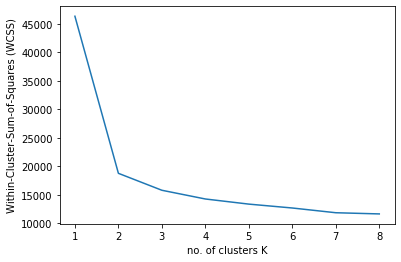

In [189]:
plt.plot(x,ls[1:])
plt.xlabel("no. of clusters K")
plt.ylabel("Within-Cluster-Sum-of-Squares (WCSS)")
plt.show()

From Above Graph it can be easily observed that K=2 is the optimum value for K means clustering

                                      Below is the Silhouette Analysis for K=2

In [14]:
sili=[]     #It is a list to store silhouette index for all individual data points in data set 

In [15]:
for id1 in clusters[1]:
    ai=0
    bi=0
    for id2 in clusters[1]:
        ai+=((((X[X[0]==id2].values[0,1:10] - X[X[0]==id1].values[0,1:10])**2).sum())**0.5)/(len(clusters[1])-1)
    for id3 in clusters[2]:
        bi+=((((X[X[0]==id3].values[0,1:10] - X[X[0]==id1].values[0,1:10])**2).sum())**0.5)/len(clusters[2])
    sili.append(((bi-ai)/max(ai,bi)))
    
for id1 in clusters[2]:
    ai=0
    bi=0
    for id2 in clusters[2]:
        ai+=((((X[X[0]==id2].values[0,1:10] - X[X[0]==id1].values[0,1:10])**2).sum())**0.5)/(len(clusters[2])-1)
    for id3 in clusters[1]:
        bi+=((((X[X[0]==id3].values[0,1:10] - X[X[0]==id1].values[0,1:10])**2).sum())**0.5)/len(clusters[1])
    sili.append(((bi-ai)/max(ai,bi)))

In [22]:
silhouette_score = sum(sili)/len(sili)  # It is Silhouette score for whole dataset
print(silhouette_score)

0.5864223530744774


So silhouette score for all points in dataset is 0.5864223530744778

    As Labeled Data is given to us as data set I can calculate precision, recall and F1 score for clustering when K=2

                       Below are the calculations for precision, recall and F1 Score

In [48]:
Y=df[[0,10]]
Y.columns = ['id number', 'True value']
Y.set_index('id number', inplace=True)

In [98]:
Y         #Given Data Y has only 2 columns id number and true value

,True value
id number,
61634,2
63375,4
76389,4
95719,4
128059,2
...,...
1369821,4
1371026,4
1371920,2


In [31]:
clusters_rev = {}

In [32]:
for v in clusters[2]:
    clusters_rev[v] = 2
for v in clusters[1]:
    clusters_rev[v] = 4

In [54]:
result = pd.DataFrame(list(clusters_rev.items()))
result.columns = ['id number', 'predicted value']
result.set_index('id number', inplace=True)

In [70]:
result                      #Result data from K means clustering when K=2

,predicted value
id number,
61634.0,2
128059.0,2
167528.0,2
169356.0,2
183913.0,2
...,...
1350423.0,4
1352663.0,4
1352848.0,4


In [68]:
final = pd.merge(Y, result,how='inner', on='id number')

In [99]:
final             #Final data which has both True value (which was given in data set) and predicted value which is predicted by 
                  #K means clustering algorithm for K=2

,True value,predicted value
id number,,
61634,2,2
63375,4,4
76389,4,4
95719,4,4
128059,2,2
...,...,...
1369821,4,4
1371026,4,4
1371920,2,2


In [100]:
FN = final[(final['True value']==2) & (final['predicted value']==4)].shape[0]      #This is FN (False Negative)

In [101]:
FP = final[(final['True value']==4) & (final['predicted value']==2)].shape[0]    #This is FP (false positive)

In [102]:
TN = final[(final['True value']==4) & (final['predicted value']==4)].shape[0]   #this is TN (True negative)

In [103]:
TP = final[(final['True value']==2) & (final['predicted value']==2)].shape[0]   #this is TP (True positive)

In [109]:
Recall = TP/(TP+FN)
print(Recall)

0.9782082324455206


In [113]:
Precision = TP/(TP+FP)
print(Precision)

0.9550827423167849


In [117]:
f1_Score = 2*(Recall)*(Precision)/(Precision + Recall)
print(f1_Score)

0.9665071770334928


From Above I found that for our K means clustering classifier
<br> Recall = 97.820% <br>
Precision = 95.508% <br>
F1 Score = 96.650% <br>